Сан:

In [74]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Функцууд:

In [4]:
def show_img(image, plt_size=8):
    fig = plt.figure(figsize=(plt_size, plt_size))
    ax = fig.add_subplot(111)
    ax.imshow(image)


def show_double_img(image1, image2, plt_size=8, gray=False):
    fig = plt.figure(figsize=(plt_size, plt_size))
    ax = fig.add_subplot(121)
    if not gray:
        ax.imshow(image1)
    else:
        ax.imshow(image1, cmap='gray')
    ax = fig.add_subplot(122)
    if not gray:
        ax.imshow(image2)
    else:
        ax.imshow(image2, cmap='gray')


def load_img(path):
    img = cv2.imread(path).astype(np.float32) / 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


def gen_img():
    blank_img = np.zeros((400, 600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='ABCDF', org=(50, 300), fontFace=font,
                fontScale=5, color=(255, 255, 255), thickness=25)
    return blank_img


def show_img_gray(image, plt_size=8):
    fig = plt.figure(figsize=(plt_size, plt_size))
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap='gray')

# Дасгал 1

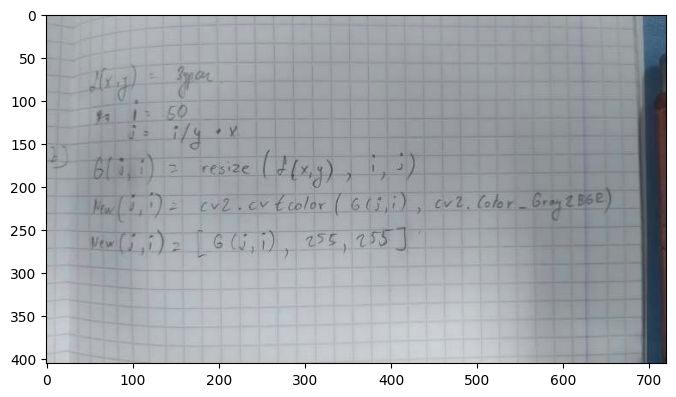

In [47]:
img = cv2.imread('image/problem1-a.jpg')
show_img(img)

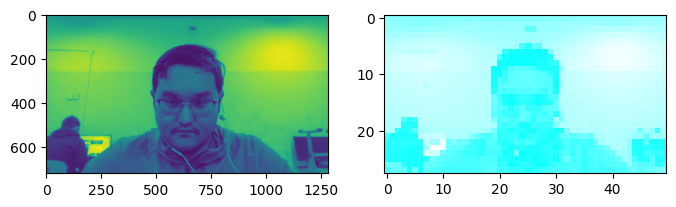

In [44]:
# gray zurag unshij avna
gray_image = cv2.imread('image/MyImage.jpg', 0)

# size iig ni bagasgah utga onoono
newSize = 50
# size-nii urguniig ni olno
ratio = newSize / gray_image.shape[1]
new_height = int(gray_image.shape[0] * ratio)

# zuragniihaa size-iig bagasgana
resized_img = cv2.resize(gray_image, (newSize, new_height))

# BGR zurag uusgene/ungut gargah gej bgaa tul/ 
newImage = cv2.cvtColor(resized_img, cv2.COLOR_GRAY2BGR)

# zuragiin buh davtaltaar tuhain gray zurgiin pixeld ymar utge \0-255\
# baigaag old BGR zurgiin ulaan hesegt olson utgaa bichij ugj bgaa
# Uchir ni BGR iin [0, 255, 255] - [255, 255, 255] utga ni tsagaan ungunuus
# cyan ungu hurtelh utgatai baidag
for y in range(resized_img.shape[0]):  # Loop over rows
    for x in range(resized_img.shape[1]):  # Loop over columns
        grayscale_value = resized_img[y, x]
        newImage[y, x] = [grayscale_value, 255, 255]

show_double_img(gray_image, newImage)

# Дасгал 2

Уг зургийг snip ашиглан шалгалтын материал дээрээс авсан тул үр дүнгийн график нь бага зэрэг зөрсөн

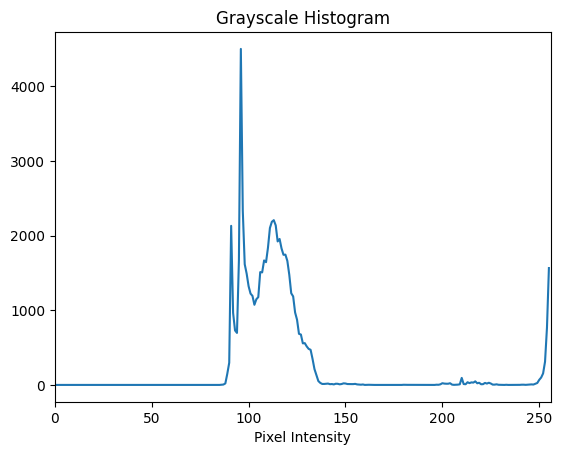

In [58]:
gray_image = cv2.imread('image/image-1.png', 0)
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()

Дээрх үр дүнгээс харахад 2-d үзүүлсэн график нь таарч байна. Учир нь уг зураг дунд зэрэг хар өнгө давамгайлсан, цайвар
өнгө нь нь мөн их байгаа учраас Histogram нь 80-130 хавьцаа гарч байна.

histogram equalization гэх аргыг ашиглан 2-b үзүүлсэн Histogram - ийг гаргаж авч болно. Үүний зорилго нь пикселийн
утгын бүх хүрээн дэх пикселийн Intensity-г жигд хуваарилах авах явдал юм

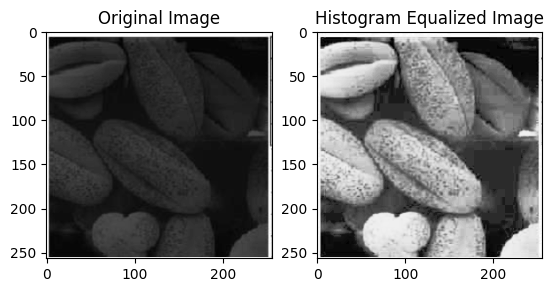

In [59]:
equalized_image = cv2.equalizeHist(gray_image)

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')

plt.show()

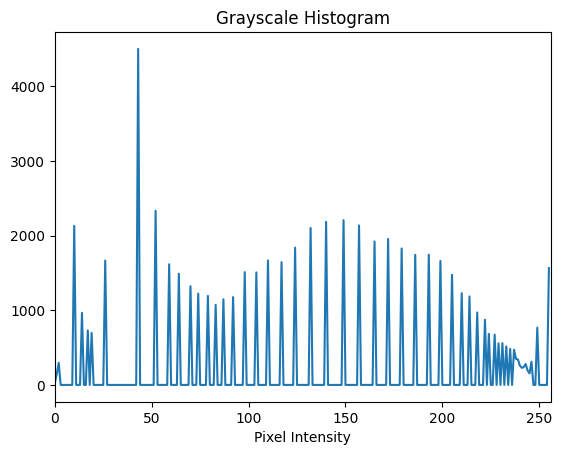

In [61]:
histogram = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()

# Дасгал 3

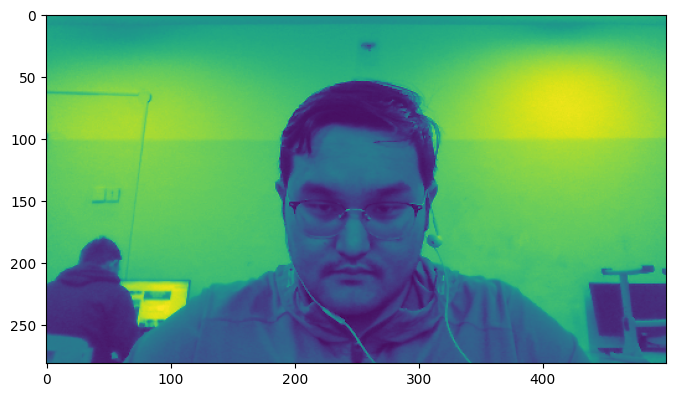

In [71]:
gray_image = cv2.imread('image/MyImage.jpg', 0)
newSize = 500
ratio = newSize / gray_image.shape[1]
new_height = int(gray_image.shape[0] * ratio)
resized_img = cv2.resize(gray_image, (newSize, new_height))
show_img(resized_img)

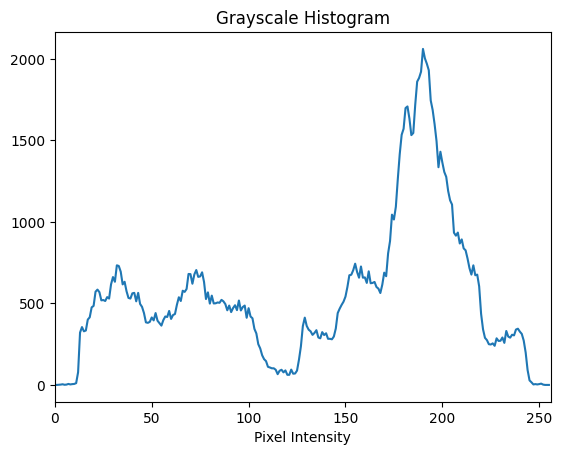

In [72]:
histogram = cv2.calcHist([resized_img], [0], None, [256], [0, 256])
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()

Үр дүнгээс харахад intensity багатай буюу бараан өнгө нь жигд байхад цайвар intensity нь их байна. Энэ нь зурагт
миний зурагны баруун зүүн хэсэгт харагдаж байна. 

# Дасгал 5

In [104]:
array = np.array([
    [10, 10, 10, 10, 10, 10, 10],
    [10, 10, 10, 69, 70, 10, 10],
    [59, 10, 60, 64, 59, 56, 60],
    [10, 59, 10, 60, 70, 10, 62],
    [10, 60, 59, 65, 67, 10, 65],
    [10, 10, 10, 10, 10, 10, 10],
    [10, 10, 10, 10, 10, 10, 10]
])

filter_1 = np.array([
    [-1, -1, -1],
    [2, 2, 2],
    [-1, -1, -1]
])

filter_2 = np.array([
    [2, -1, -1],
    [-1, 2, -1],
    [-1, -1, 2]
])

filter_3 = np.array([
    [-1, 2, -1],
    [-1, 2, -1],
    [-1, 2, -1]
])

filter_4 = np.array([
    [-1, -1, 2],
    [-1, 2, -1],
    [2, -1, -1]
])

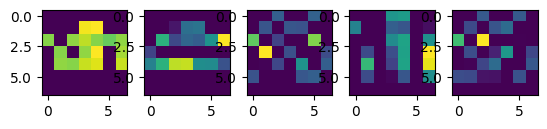

In [108]:
array = np.uint8(array)
filtered_1 = cv2.filter2D(array, ddepth=-1, kernel=filter_1)
filtered_2 = cv2.filter2D(array, ddepth=-1, kernel=filter_2)
filtered_3 = cv2.filter2D(array, ddepth=-1, kernel=filter_3)
filtered_4 = cv2.filter2D(array, ddepth=-1, kernel=filter_4)

plt.subplot(1, 5, 1)
plt.imshow(array)

plt.subplot(1, 5, 2)
plt.imshow(filtered_1)

plt.subplot(1, 5, 3)
plt.imshow(filtered_2)

plt.subplot(1, 5, 4)
plt.imshow(filtered_3)

plt.subplot(1, 5, 5)
plt.imshow(filtered_4)

Үр дүнгээс харахад:
1 дэхь шүүлтүүр нь хөндөн байгаагаар
2 дахь шүүлтүүр нь зүүн талруу диагналлаар
3 дахь шүүлтүүр нь босоо байгаагаар
4 дэхь шүүлтүүр нь баруун талруу диагналлаар
шүүж байна.


# Дасгал 6

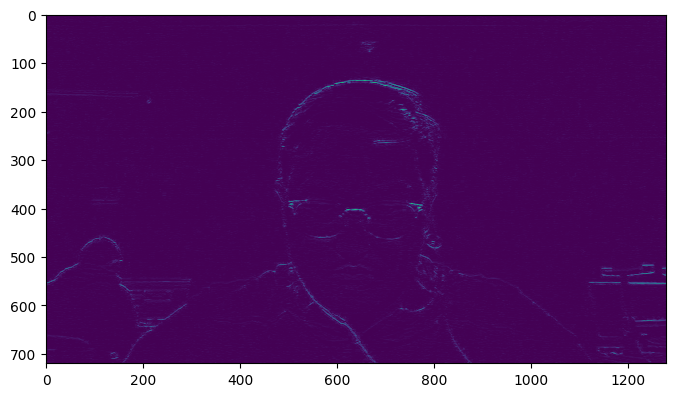

In [93]:
gray_image = cv2.imread('image/MyImage.jpg', 0)
identity = cv2.filter2D(src=gray_image, ddepth=-1, kernel=filter_1)
show_img(identity)

Зурагаас харахад зураг дээрх хөндлөн зүйлс үлдсэн байна бусад хэсэг нь арилсан.

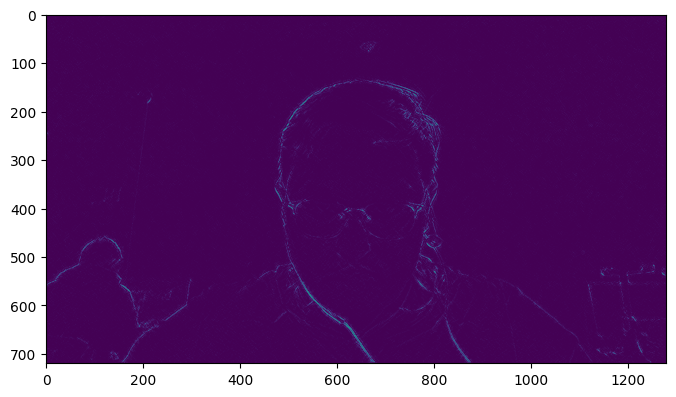

In [98]:
identity = cv2.filter2D(src=gray_image, ddepth=-1, kernel=filter_2)
show_img(identity)

Зурагаас харахад зураг дээрх баруун дээрээс зүүн доош чиглэлтэй зураг үлдсэн байна.

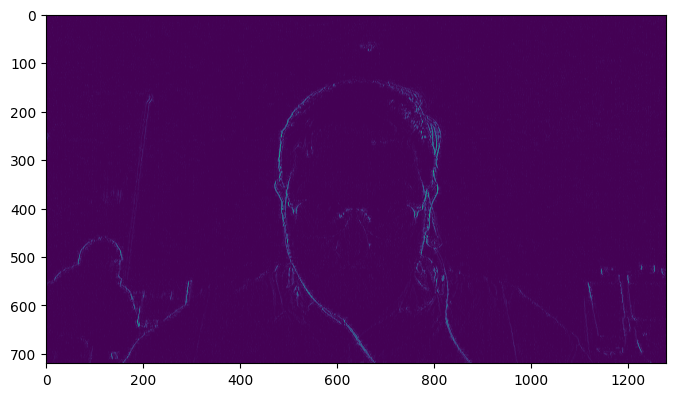

In [95]:
identity = cv2.filter2D(src=gray_image, ddepth=-1, kernel=filter_3)
show_img(identity)

Зурагаас харахад зураг босоо чиглэлтэй зураг үлдсэн байна.

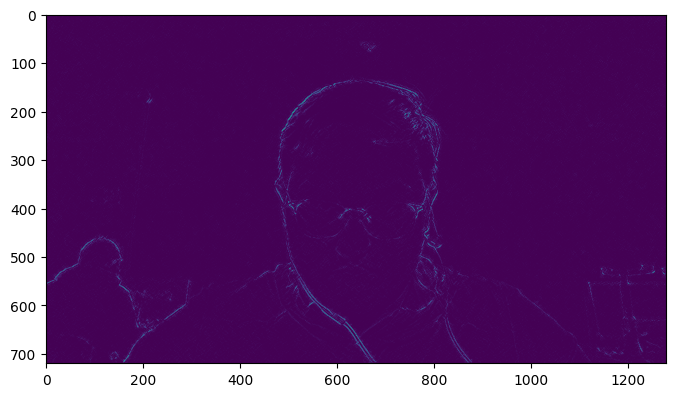

In [99]:
identity = cv2.filter2D(src=gray_image, ddepth=-1, kernel=filter_4)
show_img(identity)

Зурагаас харахад зураг дээрх зүүн дээрээс баруун доош чиглэлтэй зураг үлдсэн байна.

# Дасгал 4

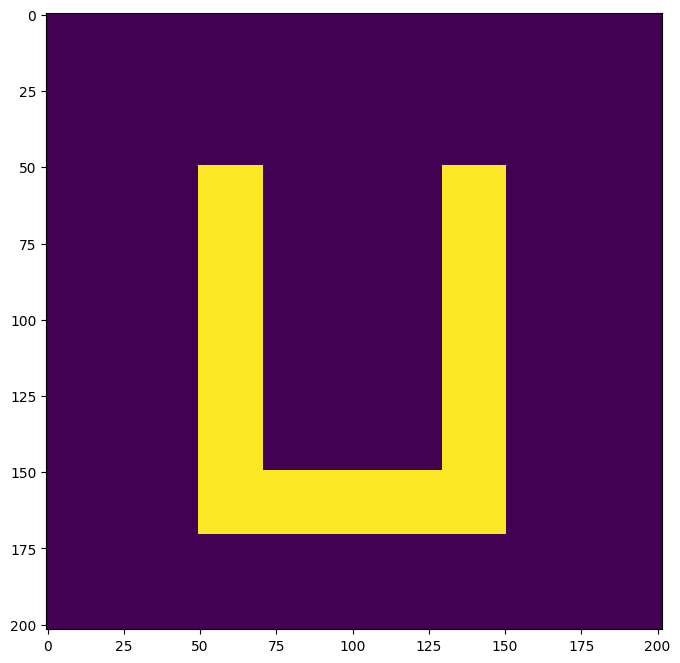

In [122]:
image_size = (202, 202)
img = np.zeros(image_size, dtype=np.uint8)

# Define the white square (U shape)
# Right part
cv2.rectangle(img, (130, 50), (150, 150), (255, 255, 255), -1)
# Left part
cv2.rectangle(img, (50, 50), (70, 150), (255, 255, 255), -1)
# Bottom part
cv2.rectangle(img, (50, 150), (150, 170), (255, 255, 255), -1)

show_img(img)

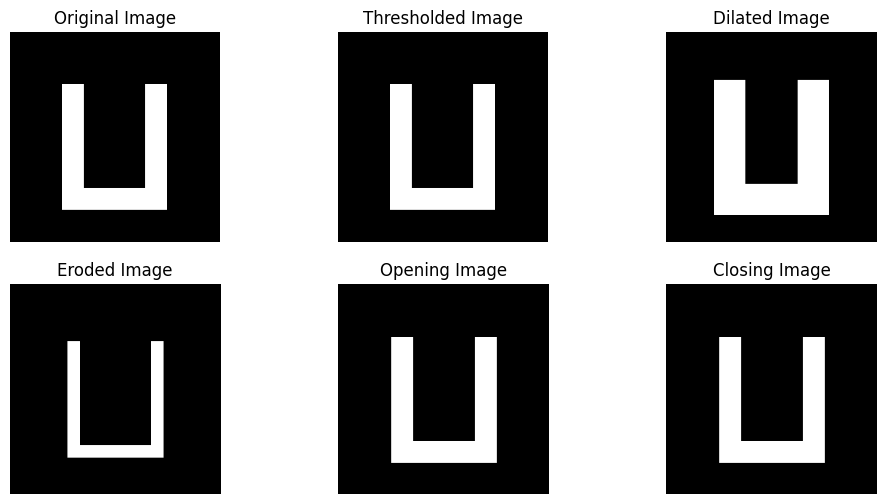

In [131]:
if img is None:
    print("Error: Unable to draw image.")
else:
    ret, th1 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

    kernel = np.ones((10, 10), np.uint8)

    dilation = cv2.dilate(th1, kernel, iterations=1)
    erosion = cv2.erode(th1, kernel, iterations=1)
    opening = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel)

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(th1, cmap='gray')
    plt.title('Thresholded Image')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(dilation, cmap='gray')
    plt.title('Dilated Image')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(erosion, cmap='gray')
    plt.title('Eroded Image')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(opening, cmap='gray')
    plt.title('Opening Image')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(closing, cmap='gray')
    plt.title('Closing Image')
    plt.axis('off')

    plt.show()